In [1]:
#importing the required modules
import matplotlib
import sklearn
import pandas

#printing the versions of installed modules
print("matplotlib: ", matplotlib.__version__)
print("sklearn :", sklearn.__version__)
print("pandas :", pandas.__version__)

matplotlib:  3.2.2
sklearn : 1.0.2
pandas : 1.3.5


**Importing the modules**

In [2]:
# importing the required modules
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [3]:
# Import the data set for KNN algorithm
dataset = pd.read_csv('KNN_Data.csv')

# storing the input values in the X variable
X = dataset.iloc[:,[0,1]].values

# storing all the ouputs in y variable
y = dataset.iloc[:,2].values

**data spliting**

In [4]:
# importing the train_test_split method from sklearn
from sklearn.model_selection import train_test_split

# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

**Feature scaling** is a technique to standardize the independent features present in the data in a fixed range. If feature scaling is not done, a Machine Learning algorithm will assume larger values to have more weight and smaller values to have less weight, regardless of the unit of measurement.

In [5]:
#Scaling the data
# applying standard scale method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the model**

In [6]:
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=3 )

# model training
classifer.fit(X_train,y_train)

# testing the model
y_pred= classifer.predict(X_test)

**accuracy**

In [7]:
# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
print(accuracy_score(y_test,y_pred))

0.8484848484848485


**How to select K value?**

Instead of randomly choosing the K-value, we can use error curves to get the optimal K-value. You need to look for a function minimum for the train data.

Let’s ploterror curves:

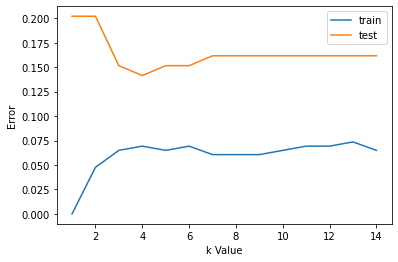

In [8]:
# Importing the numpy modlule
import numpy as np

# creating sets for errors
error1= []
error2= []

# for loop 
for k in range(1,15):
    # using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)

    # stroring the errors
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

# ploting the graphs for testing and training 
plt.plot(range(1,15), error1, label="train")
plt.plot(range(1,15), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

Based on the above graph, our trained model will give an optimal solution when the K = 4.

Let’s change the value of K to 4 in our model (then_neighbors variable in the classifier):

In [9]:
#accuracy
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 4
classifer = KNeighborsClassifier(n_neighbors=4)

# model training
classifer.fit(X_train, y_train)

# testing the model
y_pred= classifer.predict(X_test)

# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
print(accuracy_score(y_test, y_pred))

0.8585858585858586


This time the accuracy has increased and given us 85.8% accurate results. But for the best practice, we should not use any even number for the K value because it can sometimes give strange results.

# =============================

# Evaluating KNN algorithm performance

In this section of the article, we’ll show how to evaluate KNN algorithm performance.

# Confusion Matrix

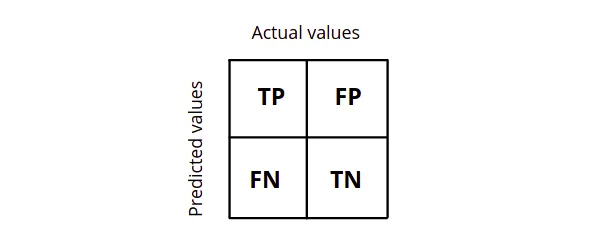

**Confusion matrix**

[[51  9]
 [ 5 34]]


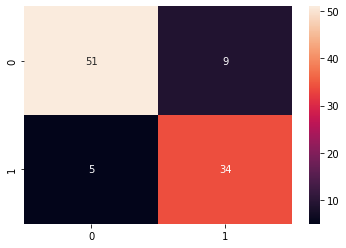

In [10]:
# importing seaborn
import seaborn as sns

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')
print(cm)

**Confusion matrix for multiclass classification**

[[5 1 1]
 [1 4 1]
 [1 1 4]]


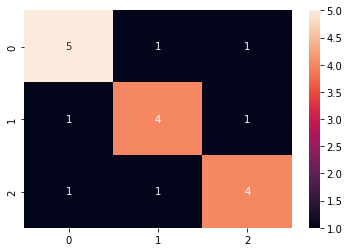

In [12]:
# importing the modules
import pandas as pd
import seaborn as sns

# import the data set from Desktop
dataset = pd.read_csv('MultiClass.csv')
Actual = dataset.iloc[:,0].values
Predicted = dataset.iloc[:,1].values

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Actual, Predicted)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
print(cm)